# Task 1: Data preparation and customer analytics

In [63]:
# import libaries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import requests
import io
import warnings
from pandasql import sqldf
import numpy as np
import seaborn as sns
from PIL import Image
import os 

warnings.filterwarnings('ignore')

### Examining transaction data 

In [64]:
# QVI_transaction_data 
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [65]:
# find any missing values
print('Missing values in QVI_transaction_data? :: ' + str(transaction_data.isnull().values.any()).upper() + '\n')

# see a statistical summary 
display(transaction_data.describe())

# see information
display(transaction_data.info())

Missing values in QVI_transaction_data? :: FALSE



,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


None

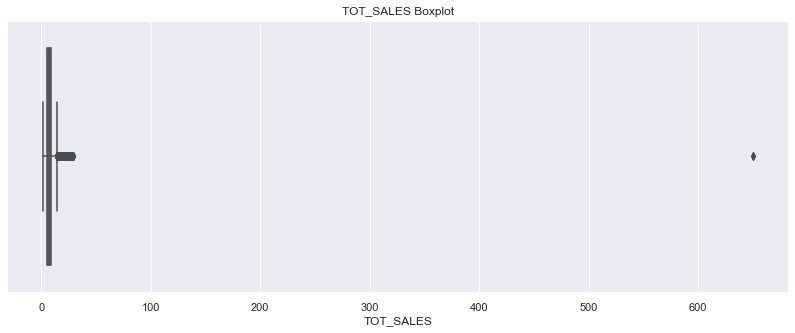

Max value -> 650.0


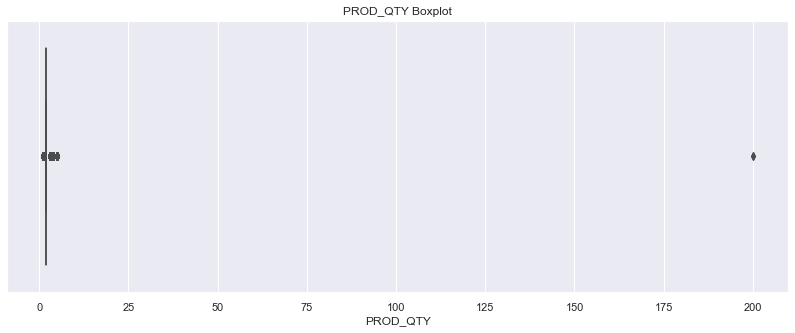

Max value -> 200


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [66]:
# check for outliers 
plt.figure(figsize = (14, 5))
sns.boxplot(x = transaction_data['TOT_SALES']).set(title = 'TOT_SALES Boxplot')
plt.savefig('visualisations/TOT_SALES_Boxplot.png')
plt.show()

# check max value for TOT_SALES as seen on the box plot
print('Max value -> {}'.format(transaction_data['TOT_SALES'].max()))

plt.figure(figsize = (14, 5))
sns.boxplot(x = transaction_data['PROD_QTY']).set(title = 'PROD_QTY Boxplot')
plt.savefig('visualisations/PROD_QTY_Boxplot.png')
plt.show()

# check max value for PROD_QTY as seen on the box plot
print('Max value -> {}'.format(transaction_data['PROD_QTY'].max()))

# get LYLTY_CARD_NBR associated with this outlier/s
display(transaction_data.loc[transaction_data['TOT_SALES'] == 650])
display(transaction_data.loc[transaction_data['PROD_QTY'] == 200])

In [67]:
# check DATE column data type 
test = transaction_data['DATE'].values.tolist()

print(type(test[1]))
print(test[1])

# result is not a date so it must be transformed into one 
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'])

transaction_data['DATE']

<class 'int'>
1557792000000000000


0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [68]:
# get PROD_NAME unique values 
unq_prods = transaction_data['PROD_NAME'].unique().tolist()

print('{} unique products by name'.format(str(len(unq_prods))))

114 unique products by name


In [69]:
# cleaning PROD_NAME column
def rmv_spaces(name):

    return re.sub(' +', ' ', name)

transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].apply(rmv_spaces)

def clean_prod_nm(name):

    if name == 'Natural Chip Compny SeaSalt175g':
        return 'Natural Chip Company SeaSalt 175g'
    elif name == 'RRD Pc Sea Salt 165g':
        return 'Red Rock Deli Sea Salt 165g'
    elif name == 'Smiths Chip Thinly CutSalt/Vinegr175g':
        return 'Smiths Chip Thinly CutSalt/Vinegr 175g'
    elif name == 'Smiths Thinly Swt Chli&S/Cream175G':
        return 'Smiths Thinly Swt Chli&S/Cream 175g'
    elif name == 'Natural ChipCo Hony Soy Chckn175g':
        return 'Natural Chip Company Honey Soy Chckn 175g'
    elif name == 'Twisties Chicken270g':
        return 'Twisties Chicken 270g'
    elif name == 'GrnWves Plus Btroot & Chilli Jam 180g':
        return 'Grain Waves Plus Btroot & Chilli Jam 180g'
    elif name == 'Kettle 135g Swt Pot Sea Salt':
        return 'Kettle Swt Pot Sea Salt 135g'
    elif name == 'Snbts Whlgrn Crisps Cheddr&Mstrd 90g':
        return 'Smiths Whlgrn Crisps Cheddr&Mstrd 90g'
    elif name == 'Smiths Crinkle Cut Chips Chs&Onion170g':
        return 'Smiths Crinkle Cut Chips Chs&Onion 170g'
    else:
        return name 

transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].apply(clean_prod_nm)
    
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace('WW', 'Woolworths')
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace('NCC', 'Natural Chip Company')
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace('Infzns', 'Infuzions')
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace('RRD', 'Red Rock Deli')
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(' 70g', ' 070g')
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(' 90g', ' 090g')

transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Company SeaSalt 175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [70]:
# dropping LYLTY_CARD_NBR = 226000 since it is an outlier as seen from the box plots in the cells above
transaction_data = transaction_data[~transaction_data['LYLTY_CARD_NBR'].isin([226000])]

transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Company SeaSalt 175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [71]:
# dropping any salsas seen in PROD_NAME since salsas != chips
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('Salsa')]

transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Company SeaSalt 175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


### Examining Customer Data

In [72]:
# QVI_purchase_behaviour 
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [73]:
# find any missing values
print('Missing values in QVI_purchase_behaviour? :: ' + str(purchase_behaviour.isnull().values.any()).upper() + '\n')

# see a statistical summary 
display(purchase_behaviour.describe())

# see information
display(purchase_behaviour.info())

Missing values in QVI_purchase_behaviour? :: FALSE



,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

In [74]:
# different customer groups 
display(purchase_behaviour['PREMIUM_CUSTOMER'].unique())

# different lifestage groups 
display(purchase_behaviour['LIFESTAGE'].unique())

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [75]:
# check to see if there are any LYLTY_CARD_NBRs in transaction_data but not in purchase_behaviour
query = """select count(TD.LYLTY_CARD_NBR) as NON_MATCHING_CARD_NBRs from transaction_data TD 
        join purchase_behaviour PB on (TD.LYLTY_CARD_NBR = PB.LYLTY_CARD_NBR) 
        where PB.LYLTY_CARD_NBR is null"""

sqldf(query)

,NON_MATCHING_CARD_NBRs
0,0


### Merging QVI_transaction_data and QVI_purchase_behaviour together 

In [76]:
# merge transaction_data and purchase behaviour together
merged_df = transaction_data.merge(purchase_behaviour, on = 'LYLTY_CARD_NBR', how = 'left')

merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Company SeaSalt 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [77]:
# add columns to help with the following cells
def get_packet_size(name):

    return name[-4:]

merged_df['SIZE'] = merged_df['PROD_NAME'].apply(get_packet_size) 
merged_df['SIZE'] = merged_df['SIZE'].str.replace('G', 'g')

merged_df['DATE_MTH'] = merged_df['DATE']
merged_df['DATE'] = merged_df['DATE'].dt.strftime('%Y-%m-%d')
merged_df['DATE_MTH'] = merged_df['DATE_MTH'].dt.strftime('%Y-%m')

def split_prod_name(name):

    split_name = name.split()
    
    return split_name[0] 

merged_df['BRAND'] = merged_df['PROD_NAME'].apply(split_prod_name)

def correct_nm(name):

    if name == 'Natural':
        return 'Natural Chip Company'
    elif name == 'Grain':
        return 'Grain Waves'
    elif name == 'Burger':
        return 'Burger Rings'
    elif name == 'Red':
        return 'Red Rock Deli'
    elif name == 'Smith':
        return 'Smiths'
    elif name == 'French':
        return 'French Fries'
    else:
        return name 

merged_df['BRAND'] = merged_df['BRAND'].apply(correct_nm)

merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,SIZE,DATE_MTH,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Company SeaSalt 175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,2018-10,Natural Chip Company
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,2019-05,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,2019-05,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175g,2018-08,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150g,2018-08,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,2019-03,Kettle
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,175g,2018-08,Tostitos
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,170g,2018-11,Doritos
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,150g,2018-12,Doritos


### Data Analysis and Customer Segments

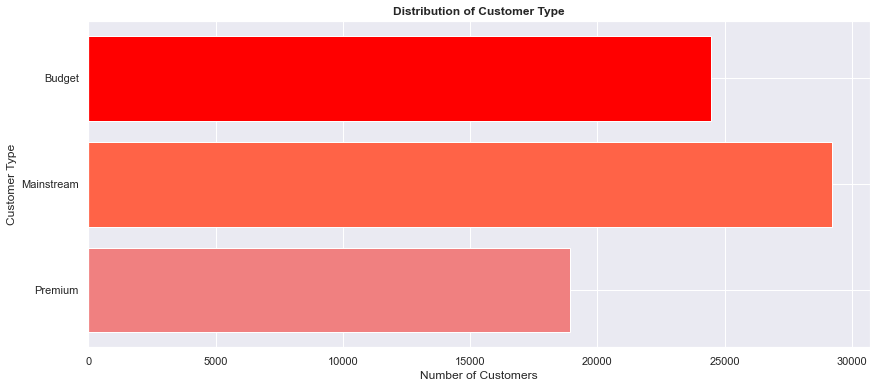

,PREMIUM_CUSTOMER,TOTAL,PERCENT
0,Premium,18922,26.05%
1,Mainstream,29245,40.26%
2,Budget,24470,33.69%
3,Total,72637,100.0%


In [78]:
# see the distribution of PREMIUM_CUSTOMERS
prem_cust_unq = purchase_behaviour['PREMIUM_CUSTOMER'].unique().tolist()
prem_cust_cnt = []

for cust in prem_cust_unq:
    prem_cust_cnt.append((purchase_behaviour.loc[purchase_behaviour['PREMIUM_CUSTOMER'] == cust]).shape[0])
    
prem_cust_distrib = pd.DataFrame({'PREMIUM_CUSTOMER':prem_cust_unq, 'TOTAL':prem_cust_cnt})

plt.figure(figsize = (14, 6))
plt.title('Distribution of Customer Type', fontweight = 'bold')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Type')
plt.barh(prem_cust_distrib['PREMIUM_CUSTOMER'], prem_cust_distrib['TOTAL'], color = ['lightcoral', 'tomato', 'red'])
plt.savefig('visualisations/Distribution_Of_Customer_Type.png')
plt.show()

total_num = prem_cust_distrib['TOTAL'].sum()

prem_cust_distrib.loc[len(prem_cust_distrib)] = ['Total', prem_cust_distrib['TOTAL'].sum()]

def get_percentages(total):

    return '{}%'.format(str(round(((total/total_num) * 100), 2)))

prem_cust_distrib['PERCENT'] = prem_cust_distrib['TOTAL'].apply(get_percentages)

display(prem_cust_distrib)

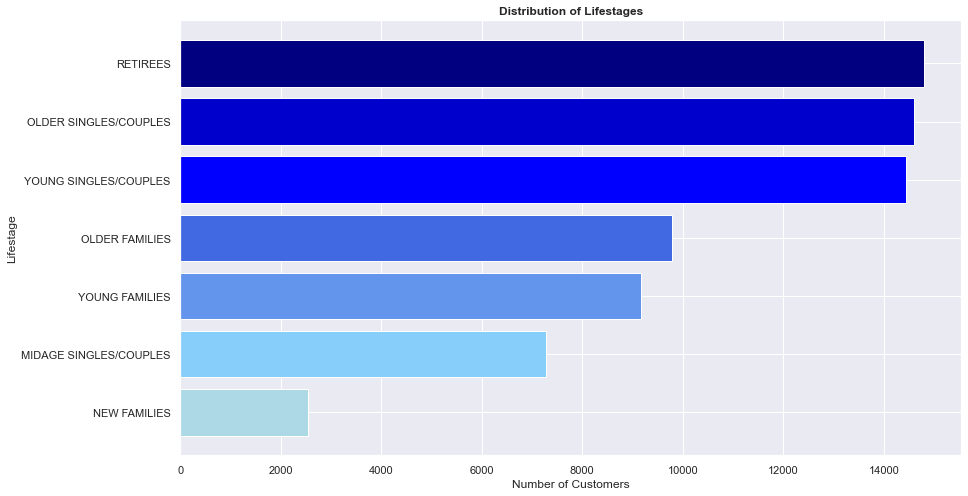

,LIFESTAGE,TOTAL,PERCENT
0,NEW FAMILIES,2549,3.51%
1,MIDAGE SINGLES/COUPLES,7275,10.02%
2,YOUNG FAMILIES,9178,12.64%
3,OLDER FAMILIES,9780,13.46%
4,YOUNG SINGLES/COUPLES,14441,19.88%
5,OLDER SINGLES/COUPLES,14609,20.11%
6,RETIREES,14805,20.38%
7,Total,72637,100.0%


In [79]:
# see the distribution of LIFESTAGE
lifestg_unq = purchase_behaviour['LIFESTAGE'].unique().tolist()
lifestg_unq_cnt = []

for lifestg in lifestg_unq:
    lifestg_unq_cnt.append((purchase_behaviour.loc[purchase_behaviour['LIFESTAGE'] == lifestg]).shape[0])

lifestg_distrib = pd.DataFrame({'LIFESTAGE':lifestg_unq, 'TOTAL':lifestg_unq_cnt}) 

# sorting for plotting purposes
lifestg_distrib.sort_values(by = 'TOTAL', ascending = True, inplace = True)
lifestg_distrib.reset_index(drop = True, inplace = True)

plt.figure(figsize = (14, 8))
plt.title('Distribution of Lifestages', fontweight = 'bold')
plt.xlabel('Number of Customers')
plt.ylabel('Lifestage')
plt.barh(lifestg_distrib['LIFESTAGE'], lifestg_distrib['TOTAL'], color = ['lightblue', 'lightskyblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'navy'])
plt.savefig('visualisations/Distribution_Of_Lifestages.png', bbox_inches = 'tight')
plt.show()

total_num = lifestg_distrib['TOTAL'].sum()

lifestg_distrib.loc[len(lifestg_distrib)] = ['Total', lifestg_distrib['TOTAL'].sum()]

def get_percentages(total):

    return '{}%'.format(str(round(((total/total_num) * 100), 2)))

lifestg_distrib['PERCENT'] = lifestg_distrib['TOTAL'].apply(get_percentages)

display(lifestg_distrib)

,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL
0,YOUNG SINGLES/COUPLES,Premium,2574
1,YOUNG SINGLES/COUPLES,Mainstream,8088
2,YOUNG SINGLES/COUPLES,Budget,3779
3,YOUNG FAMILIES,Budget,4017
4,YOUNG FAMILIES,Mainstream,2728
5,YOUNG FAMILIES,Premium,2433
6,OLDER SINGLES/COUPLES,Mainstream,4930
7,OLDER SINGLES/COUPLES,Premium,4750
8,OLDER SINGLES/COUPLES,Budget,4929
9,MIDAGE SINGLES/COUPLES,Mainstream,3340


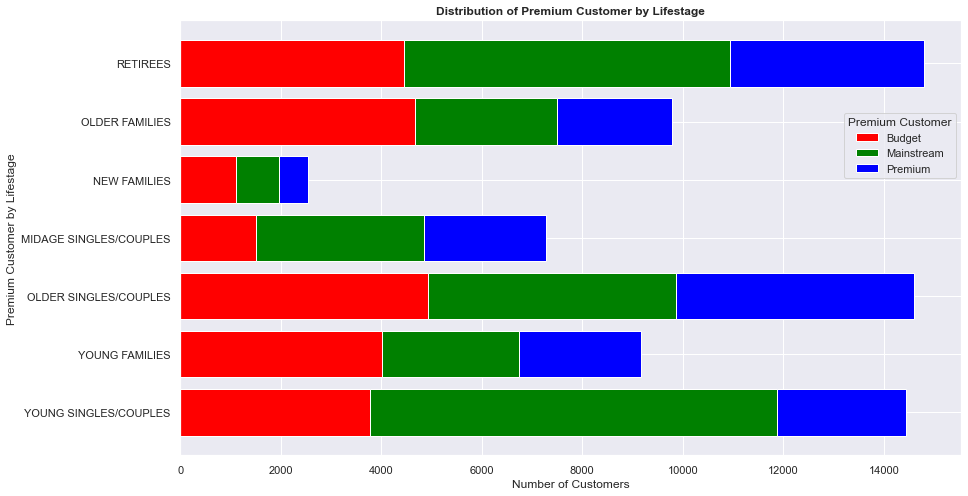

In [80]:
# see distribution of PREMIUM CUSTOMER split via LIFESTAGE 
lifestg_unq = purchase_behaviour['LIFESTAGE'].unique().tolist()
list_of_dfs = []

for lifestg in lifestg_unq:
    df = purchase_behaviour.loc[purchase_behaviour['LIFESTAGE'] == lifestg]
    prem_cust_unq = df['PREMIUM_CUSTOMER'].unique().tolist()

    lifestgs = []

    for i in range(len(prem_cust_unq)):
        lifestgs.append(lifestg)

    cnts = []

    for j in prem_cust_unq:
        cnts.append((df.loc[df['PREMIUM_CUSTOMER'] == j]).shape[0])
    
    result_df = pd.DataFrame({'LIFESTAGE':lifestg, 'PREMIUM_CUSTOMER':prem_cust_unq, 'TOTAL':cnts})
    list_of_dfs.append(result_df)

prem_cust_ls = pd.concat(list_of_dfs).reset_index(drop = True)

display(prem_cust_ls)

lifestg_unq = prem_cust_ls['LIFESTAGE'].unique().tolist()
budget = []
mainstream = []
premium = []

for a in lifestg_unq:
    aa = prem_cust_ls.loc[prem_cust_ls['LIFESTAGE'] == a]

    budget_df = aa.loc[aa['PREMIUM_CUSTOMER'] == 'Budget']
    budget.append(budget_df['TOTAL'].values[0])

    mainstream_df = aa.loc[aa['PREMIUM_CUSTOMER'] == 'Mainstream']
    mainstream.append(mainstream_df['TOTAL'].values[0])

    premium_df = aa.loc[aa['PREMIUM_CUSTOMER'] == 'Premium']
    premium.append(premium_df['TOTAL'].values[0])

plt.figure(figsize = (14, 8))
plt.title('Distribution of Premium Customer by Lifestage', fontweight = 'bold')
plt.xlabel('Number of Customers')
plt.ylabel('Premium Customer by Lifestage')
bud = plt.barh(lifestg_unq, budget, color = 'red')
main = plt.barh(lifestg_unq, mainstream, left = budget, color = 'green')
prem = plt.barh(lifestg_unq, premium, left = np.add(budget, mainstream), color = 'blue')
plt.legend([bud, main, prem], ['Budget', 'Mainstream', 'Premium'], title = 'Premium Customer', loc = 'upper right', bbox_to_anchor = (1, 0.8))
plt.savefig('visualisations/Distribution_Of_Premium_Customer_By_Lifestage.png', bbox_inches = 'tight')
plt.show()

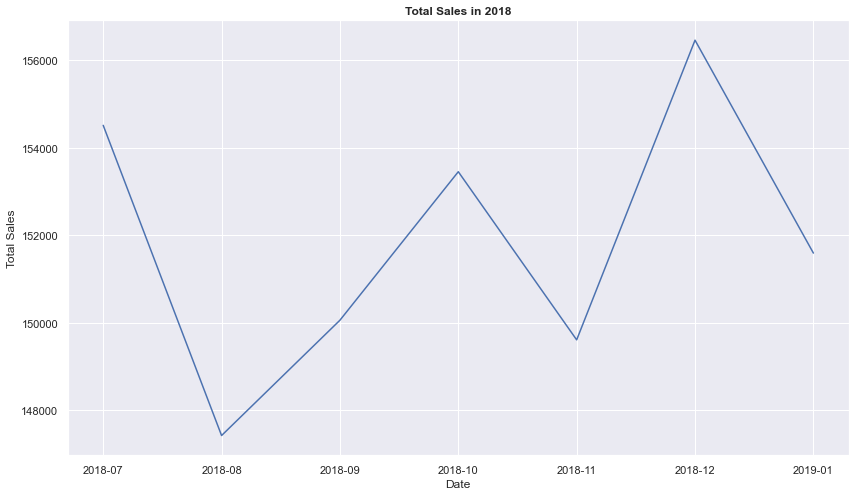

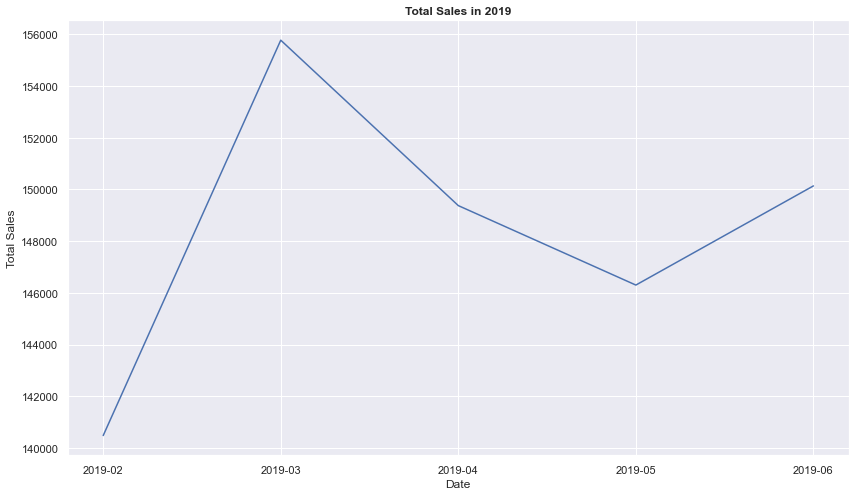

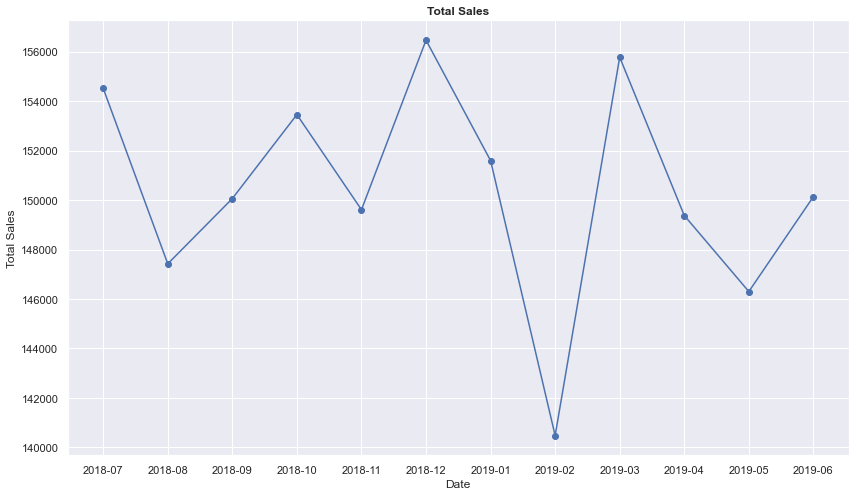

In [81]:
# TOT_SALES over time 
unq_date = merged_df['DATE_MTH'].unique().tolist()
total_sales = []

for date in unq_date:
    helper_df = merged_df.loc[merged_df['DATE_MTH'] == date]
    total_sales.append(round(helper_df['TOT_SALES'].sum(), 2))

sales_ov_t = pd.DataFrame({'DATE':unq_date, 'TOTAL_SALES':total_sales})

sales_ov_t.sort_values(by = ['DATE'], ascending = True, inplace = True)

sales_ov_t.reset_index(drop = True, inplace = True)

yr_2018 = sales_ov_t.loc[sales_ov_t['DATE'] < '2019-01-01'] 
plt.figure(figsize = (14, 8))
plt.title('Total Sales in 2018', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.plot(yr_2018['DATE'], yr_2018['TOTAL_SALES'])
plt.savefig('visualisations/Total_Sales_2018.png')
plt.show()

yr_2019 = sales_ov_t.loc[(sales_ov_t['DATE'] <= sales_ov_t['DATE'].max()) & (sales_ov_t['DATE'] >= '2019-01-01')] 
plt.figure(figsize = (14, 8))
plt.title('Total Sales in 2019', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.plot(yr_2019['DATE'], yr_2019['TOTAL_SALES'])
plt.savefig('visualisations/Total_Sales_2019.png')
plt.show()

plt.figure(figsize = (14, 8))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.plot(sales_ov_t['DATE'], sales_ov_t['TOTAL_SALES'], marker = 'o')
plt.savefig('visualisations/Total_Sales.png')
plt.show()

,BRAND,TOT_SALES
0,Sunbites,4600.2
1,Burger Rings,6831.0
2,French Fries,7929.0
3,Cheetos,16884.5
4,CCs,18078.9
5,Dorito,39052.0
6,Cheezels,40029.9
7,Woolworths,41059.1
8,Natural Chip Company,42318.0
9,Grain Waves,51617.2


,BRAND,PROD_QTY
0,French Fries,2643
1,Sunbites,2706
2,Burger Rings,2970
3,Cheetos,5530
4,Dorito,6109
5,CCs,8609
6,Cheezels,8747
7,Tyrrells,12298
8,Natural Chip Company,14106
9,Grain Waves,14726


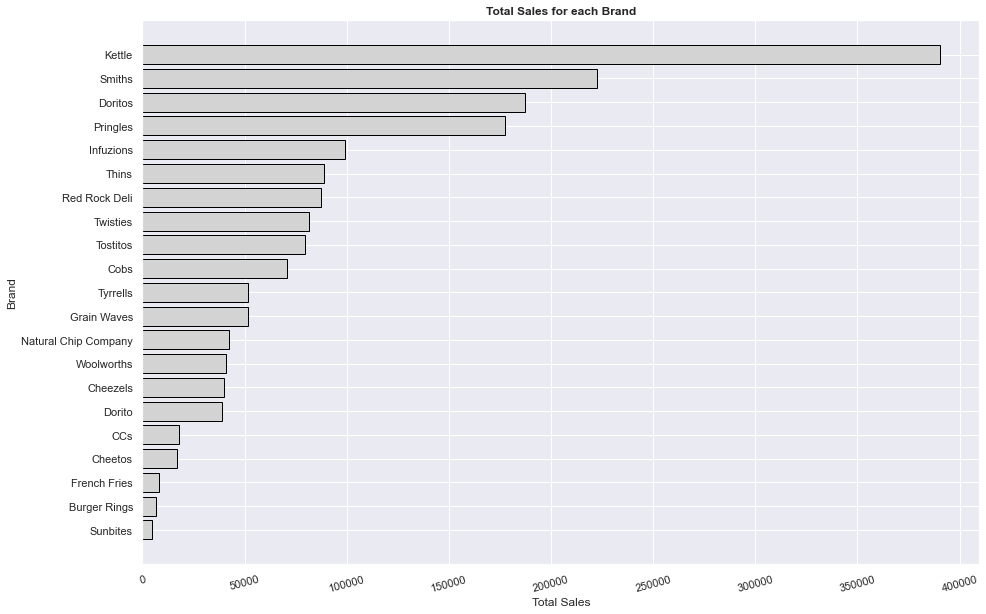

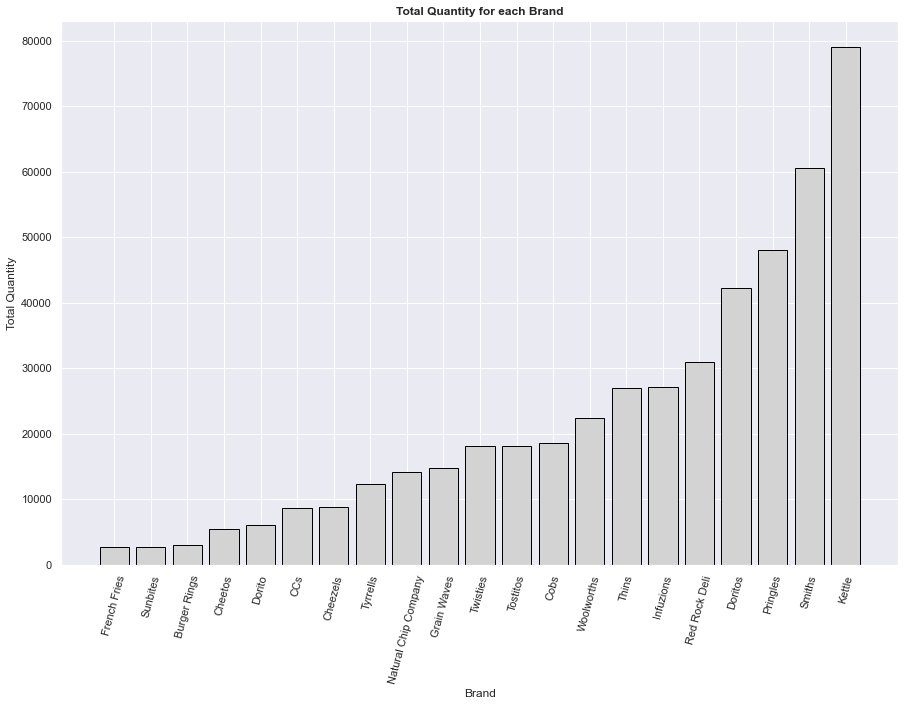

In [82]:
# TOT_SALES for each BRAND 
unq_brand = merged_df['BRAND'].unique().tolist()

unq_brand_sales = []

for brand in unq_brand:
    brand_df = merged_df.loc[merged_df['BRAND'] == brand]  

    unq_brand_sales.append(brand_df['TOT_SALES'].sum())

tot_sales_per_brand = pd.DataFrame({'BRAND':unq_brand, 'TOT_SALES':unq_brand_sales})

tot_sales_per_brand.sort_values(by = ['TOT_SALES'], ascending = True, inplace = True)

tot_sales_per_brand.reset_index(drop = True, inplace = True)

display(tot_sales_per_brand)

# total PROD_QTY for each BRAND 
unq_brand_cnt = []

for brand in unq_brand:
    brand_df = merged_df.loc[merged_df['BRAND'] == brand]  

    unq_brand_cnt.append(brand_df['PROD_QTY'].sum())

tot_cnt_per_brand = pd.DataFrame({'BRAND':unq_brand, 'PROD_QTY':unq_brand_cnt})

tot_cnt_per_brand.sort_values(by = ['PROD_QTY'], ascending = True, inplace = True)

tot_cnt_per_brand.reset_index(drop = True, inplace = True)

display(tot_cnt_per_brand)

plt.figure(figsize = (15, 10))
plt.title('Total Sales for each Brand', fontweight = 'bold')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
plt.xticks(rotation = 15)
plt.barh(tot_sales_per_brand['BRAND'], tot_sales_per_brand['TOT_SALES'], color = 'lightgrey', edgecolor = 'black')
plt.savefig('visualisations/Total_Sales_For_Each_Brand.png')
plt.show()

plt.figure(figsize = (15, 10))
plt.title('Total Quantity for each Brand', fontweight = 'bold')
plt.xlabel('Brand')
plt.ylabel('Total Quantity')
plt.xticks(rotation = 75)
plt.bar(tot_cnt_per_brand['BRAND'], tot_cnt_per_brand['PROD_QTY'], color = 'lightgrey', edgecolor = 'black')
plt.savefig('visualisations/Total_Quantity_For_Each_Brand.png')
plt.show()

,SIZE,TOT_SALES
0,125g,5733.0
1,220g,6831.0
2,070g,6852.0
3,180g,8568.4
4,090g,9676.4
5,160g,10647.6
6,190g,14412.9
7,200g,16007.5
8,135g,26090.4
9,250g,26096.7


,SIZE,PROD_QTY
0,125g,2730
1,180g,2764
2,070g,2855
3,220g,2970
4,160g,5604
5,190g,5673
6,090g,5692
7,250g,6069
8,135g,6212
9,200g,8425


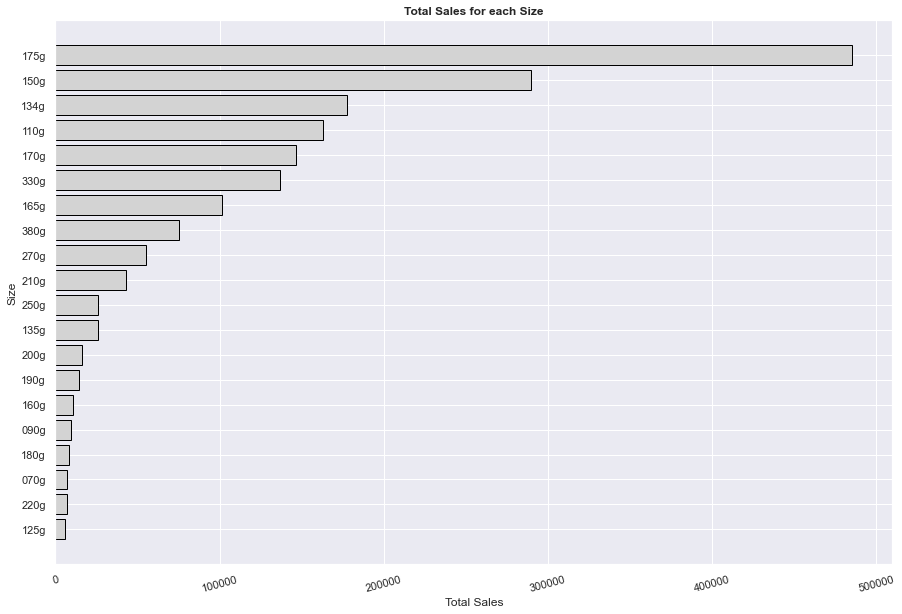

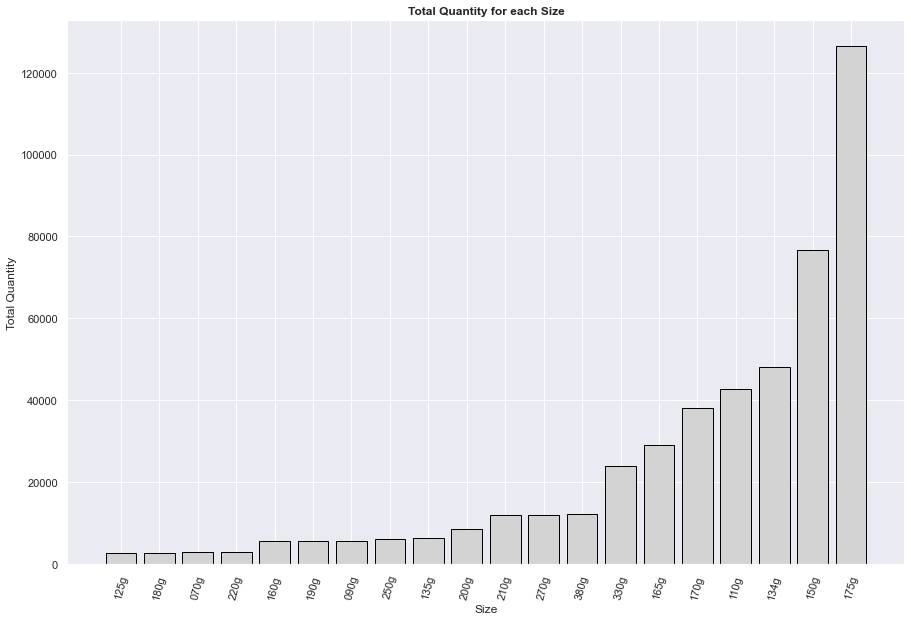

In [83]:
# TOT_SALES for each SIZE
unq_size = merged_df['SIZE'].unique().tolist()

unq_size_sales = []

for size in unq_size:
    size_df = merged_df.loc[merged_df['SIZE'] == size]  

    unq_size_sales.append(size_df['TOT_SALES'].sum())

tot_sales_per_size = pd.DataFrame({'SIZE':unq_size, 'TOT_SALES':unq_size_sales})

tot_sales_per_size.sort_values(by = ['TOT_SALES'], ascending = True, inplace = True)

tot_sales_per_size.reset_index(drop = True, inplace = True)

display(tot_sales_per_size)

# total PROD_QTY for each SIZE
unq_size_cnt = []

for size in unq_size:
    size_df = merged_df.loc[merged_df['SIZE'] == size]  

    unq_size_cnt.append(size_df['PROD_QTY'].sum())

tot_cnt_per_size = pd.DataFrame({'SIZE':unq_size, 'PROD_QTY':unq_size_cnt})

tot_cnt_per_size.sort_values(by = ['PROD_QTY'], ascending = True, inplace = True)

tot_cnt_per_size.reset_index(drop = True, inplace = True)

display(tot_cnt_per_size)

plt.figure(figsize = (15, 10))
plt.title('Total Sales for each Size', fontweight = 'bold')
plt.xlabel('Total Sales')
plt.ylabel('Size')
plt.xticks(rotation = 15)
plt.barh(tot_sales_per_size['SIZE'], tot_sales_per_size['TOT_SALES'], color = 'lightgrey', edgecolor = 'black')
plt.savefig('visualisations/Total_Sales_For_Each_Size.png')
plt.show()

plt.figure(figsize = (15, 10))
plt.title('Total Quantity for each Size', fontweight = 'bold')
plt.xlabel('Size')
plt.ylabel('Total Quantity')
plt.xticks(rotation = 75)
plt.bar(tot_cnt_per_size['SIZE'], tot_cnt_per_size['PROD_QTY'], color = 'lightgrey', edgecolor = 'black')
plt.savefig('visualisations/Total_Quantity_For_Each_Size.png')
plt.show()

,BRAND,SIZE,TOTAL,SALES
0,Natural Chip Company,175g,7469,42318.0
1,Natural Chip Company,170g,0,0.0
2,Natural Chip Company,150g,0,0.0
3,Natural Chip Company,330g,0,0.0
4,Natural Chip Company,210g,0,0.0
...,...,...,...,...
415,Sunbites,200g,0,0.0
416,Sunbites,160g,0,0.0
417,Sunbites,190g,0,0.0
418,Sunbites,090g,1432,4600.2


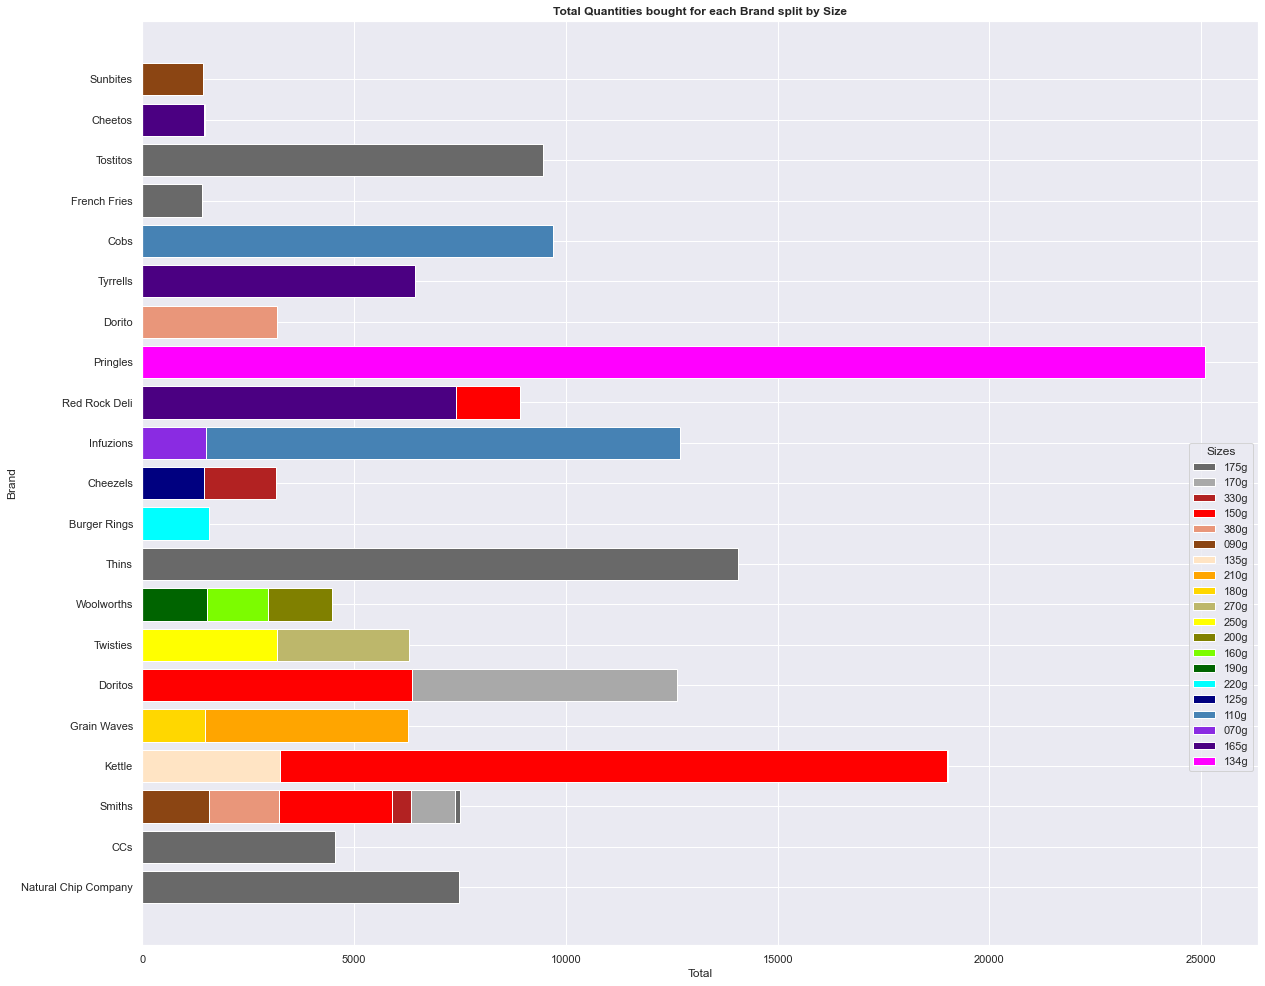

In [84]:
# total PROD_QTY for each BRAND split by SIZE 
unq_brand = merged_df['BRAND'].unique().tolist()

hold_dfs = []

for brand in unq_brand:
    brand_df = merged_df.loc[merged_df['BRAND'] == brand]

    get_unq_sizes_per_brand = merged_df['SIZE'].unique().tolist()

    get_cnts = []

    for size in get_unq_sizes_per_brand:
        get_cnts.append((brand_df.loc[brand_df['SIZE'] == size]).shape[0])

    get_sales = []

    for size in get_unq_sizes_per_brand:
        brand_df1 = brand_df.loc[brand_df['SIZE'] == size]

        get_sales.append(brand_df1['TOT_SALES'].sum())

    get_brands = []

    for i in range(len(get_cnts)):
        get_brands.append(brand)

    to_be_appded = pd.DataFrame({'BRAND':get_brands, 'SIZE':get_unq_sizes_per_brand, 'TOTAL':get_cnts, 'SALES':get_sales})
    
    hold_dfs.append(to_be_appded)

sale_per_brand_split_df = pd.concat(hold_dfs)

sale_per_brand_split_df.reset_index(drop = True, inplace = True)

display(sale_per_brand_split_df)

unq_brand_4_plot = sale_per_brand_split_df['BRAND'].unique().tolist()
_175g_ = []
_170g_ = []
_330g_ = []
_150g_ = []
_380g_ = []
_090g_ = []
_135g_ = []
_210g_ = []
_180g_ = []
_270g_ = []
_250g_ = []
_200g_ = []
_160g_ = []
_190g_ = []
_220g_ = []
_125g_ = []
_110g_ = []
_070g_ = []
_165g_ = []
_134g_ = []

for brand in unq_brand_4_plot:
    get_brand = sale_per_brand_split_df.loc[sale_per_brand_split_df['BRAND'] == brand]

    df_175g = get_brand.loc[get_brand['SIZE'] == '175g']
    _175g_.append(df_175g['TOTAL'].values[0])

    df_170g = get_brand.loc[get_brand['SIZE'] == '170g']
    _170g_.append(df_170g['TOTAL'].values[0])

    df_330g = get_brand.loc[get_brand['SIZE'] == '330g']
    _330g_.append(df_330g['TOTAL'].values[0])

    df_150g = get_brand.loc[get_brand['SIZE'] == '150g']
    _150g_.append(df_150g['TOTAL'].values[0])

    df_380g = get_brand.loc[get_brand['SIZE'] == '380g']
    _380g_.append(df_380g['TOTAL'].values[0])

    df_090g = get_brand.loc[get_brand['SIZE'] == '090g']
    _090g_.append(df_090g['TOTAL'].values[0])

    df_135g = get_brand.loc[get_brand['SIZE'] == '135g']
    _135g_.append(df_135g['TOTAL'].values[0])

    df_210g = get_brand.loc[get_brand['SIZE'] == '210g']
    _210g_.append(df_210g['TOTAL'].values[0])

    df_180g = get_brand.loc[get_brand['SIZE'] == '180g']
    _180g_.append(df_180g['TOTAL'].values[0])

    df_270g = get_brand.loc[get_brand['SIZE'] == '270g']
    _270g_.append(df_270g['TOTAL'].values[0])

    df_250g = get_brand.loc[get_brand['SIZE'] == '250g']
    _250g_.append(df_250g['TOTAL'].values[0])

    df_200g = get_brand.loc[get_brand['SIZE'] == '200g']
    _200g_.append(df_200g['TOTAL'].values[0])

    df_160g = get_brand.loc[get_brand['SIZE'] == '160g']
    _160g_.append(df_160g['TOTAL'].values[0])

    df_190g = get_brand.loc[get_brand['SIZE'] == '190g']
    _190g_.append(df_190g['TOTAL'].values[0])

    df_220g = get_brand.loc[get_brand['SIZE'] == '220g']
    _220g_.append(df_220g['TOTAL'].values[0])

    df_125g = get_brand.loc[get_brand['SIZE'] == '125g']
    _125g_.append(df_125g['TOTAL'].values[0])

    df_110g = get_brand.loc[get_brand['SIZE'] == '110g']
    _110g_.append(df_110g['TOTAL'].values[0])

    df_070g = get_brand.loc[get_brand['SIZE'] == '070g']
    _070g_.append(df_070g['TOTAL'].values[0])

    df_165g = get_brand.loc[get_brand['SIZE'] == '165g']
    _165g_.append(df_165g['TOTAL'].values[0])

    df_134g = get_brand.loc[get_brand['SIZE'] == '134g']
    _134g_.append(df_134g['TOTAL'].values[0])

plt.figure(figsize = (20, 17))
plt.title('Total Quantities bought for each Brand split by Size', fontweight = 'bold')
plt.xlabel('Total')
plt.ylabel('Brand')
_175g = plt.barh(unq_brand_4_plot, _175g_, color = 'dimgray')
_170g = plt.barh(unq_brand_4_plot, _170g_, color = 'darkgrey')
_330g = plt.barh(unq_brand_4_plot, _330g_, color = 'firebrick')
_150g = plt.barh(unq_brand_4_plot, _150g_, color = 'red')
_380g = plt.barh(unq_brand_4_plot, _380g_, color = 'darksalmon')
_090g = plt.barh(unq_brand_4_plot, _090g_, color = 'saddlebrown')
_135g = plt.barh(unq_brand_4_plot, _135g_, color = 'bisque')
_210g = plt.barh(unq_brand_4_plot, _210g_, color = 'orange')
_180g = plt.barh(unq_brand_4_plot, _180g_, color = 'gold')
_270g = plt.barh(unq_brand_4_plot, _270g_, color = 'darkkhaki')
_250g = plt.barh(unq_brand_4_plot, _250g_, color = 'yellow')
_200g = plt.barh(unq_brand_4_plot, _200g_, color = 'olive')
_160g = plt.barh(unq_brand_4_plot, _160g_, color = 'lawngreen')
_190g = plt.barh(unq_brand_4_plot, _190g_, color = 'darkgreen')
_220g = plt.barh(unq_brand_4_plot, _220g_, color = 'cyan')
_125g = plt.barh(unq_brand_4_plot, _125g_, color = 'navy')
_110g = plt.barh(unq_brand_4_plot, _110g_, color = 'steelblue')
_070g = plt.barh(unq_brand_4_plot, _070g_, color = 'blueviolet')
_165g = plt.barh(unq_brand_4_plot, _165g_, color = 'indigo')
_134g = plt.barh(unq_brand_4_plot, _134g_, color = 'magenta')
plt.legend([_175g, 
_170g, 
_330g, 
_150g, 
_380g, 
_090g, 
_135g, 
_210g, 
_180g, 
_270g, 
_250g, 
_200g, 
_160g, 
_190g, 
_220g, 
_125g, 
_110g, 
_070g, 
_165g, 
_134g], ['175g',
'170g', 
'330g', 
'150g', 
'380g', 
'090g', 
'135g', 
'210g', 
'180g', 
'270g', 
'250g', 
'200g', 
'160g', 
'190g', 
'220g', 
'125g', 
'110g', 
'070g', 
'165g', 
'134g']
, title = 'Sizes', loc = 'upper right', bbox_to_anchor = (1, 0.55))
plt.savefig('visualisations/Total_Quantities_Bought_For_Each_Brand_Split_By_Size.png')
plt.show()

,BRAND,SIZE,TOTAL,SALES
0,Natural Chip Company,175g,7469,42318.0
1,Natural Chip Company,170g,0,0.0
2,Natural Chip Company,150g,0,0.0
3,Natural Chip Company,330g,0,0.0
4,Natural Chip Company,210g,0,0.0
...,...,...,...,...
415,Sunbites,200g,0,0.0
416,Sunbites,160g,0,0.0
417,Sunbites,190g,0,0.0
418,Sunbites,090g,1432,4600.2


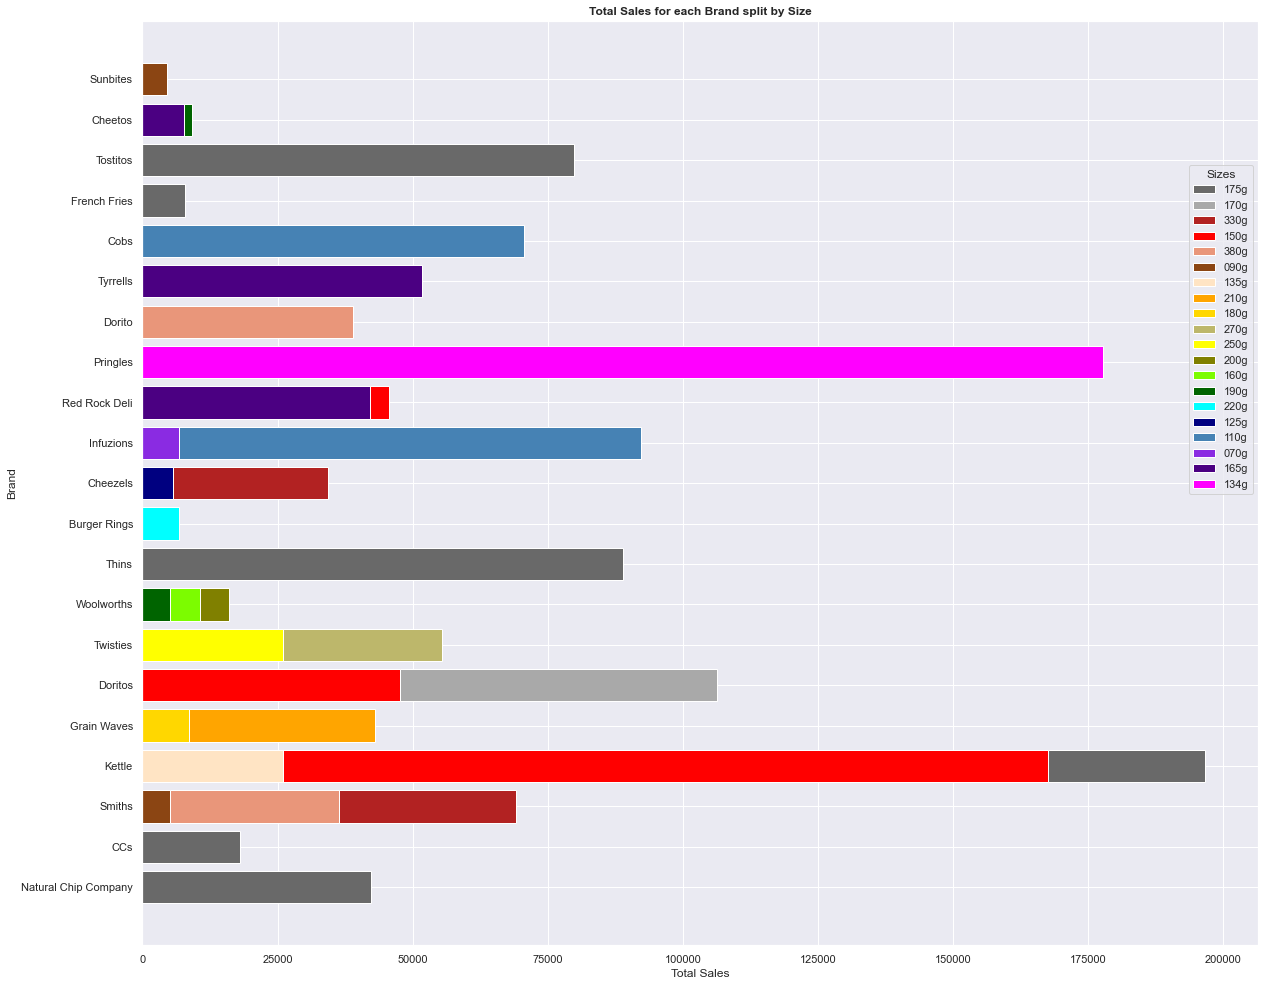

In [85]:
# TOT_SALES for each BRAND split by SIZE 
unq_brand = merged_df['BRAND'].unique().tolist()

hold_dfs = []

for brand in unq_brand:
    brand_df = merged_df.loc[merged_df['BRAND'] == brand]

    get_unq_sizes_per_brand = merged_df['SIZE'].unique().tolist()

    get_cnts = []

    for size in get_unq_sizes_per_brand:
        get_cnts.append((brand_df.loc[brand_df['SIZE'] == size]).shape[0])

    get_sales = []

    for size in get_unq_sizes_per_brand:
        brand_df1 = brand_df.loc[brand_df['SIZE'] == size]

        get_sales.append(brand_df1['TOT_SALES'].sum())

    get_brands = []

    for i in range(len(get_cnts)):
        get_brands.append(brand)

    to_be_appded = pd.DataFrame({'BRAND':get_brands, 'SIZE':get_unq_sizes_per_brand, 'TOTAL':get_cnts, 'SALES':get_sales})
    
    hold_dfs.append(to_be_appded)

sale_per_brand_split_df = pd.concat(hold_dfs)

sale_per_brand_split_df.reset_index(drop = True, inplace = True)

display(sale_per_brand_split_df)

unq_brand_4_plot = sale_per_brand_split_df['BRAND'].unique().tolist()
_175g_ = []
_170g_ = []
_330g_ = []
_150g_ = []
_380g_ = []
_090g_ = []
_135g_ = []
_210g_ = []
_180g_ = []
_270g_ = []
_250g_ = []
_200g_ = []
_160g_ = []
_190g_ = []
_220g_ = []
_125g_ = []
_110g_ = []
_070g_ = []
_165g_ = []
_134g_ = []

for brand in unq_brand_4_plot:
    get_brand = sale_per_brand_split_df.loc[sale_per_brand_split_df['BRAND'] == brand]

    df_175g = get_brand.loc[get_brand['SIZE'] == '175g']
    _175g_.append(df_175g['SALES'].values[0])

    df_170g = get_brand.loc[get_brand['SIZE'] == '170g']
    _170g_.append(df_170g['SALES'].values[0])

    df_330g = get_brand.loc[get_brand['SIZE'] == '330g']
    _330g_.append(df_330g['SALES'].values[0])

    df_150g = get_brand.loc[get_brand['SIZE'] == '150g']
    _150g_.append(df_150g['SALES'].values[0])

    df_380g = get_brand.loc[get_brand['SIZE'] == '380g']
    _380g_.append(df_380g['SALES'].values[0])

    df_090g = get_brand.loc[get_brand['SIZE'] == '090g']
    _090g_.append(df_090g['SALES'].values[0])

    df_135g = get_brand.loc[get_brand['SIZE'] == '135g']
    _135g_.append(df_135g['SALES'].values[0])

    df_210g = get_brand.loc[get_brand['SIZE'] == '210g']
    _210g_.append(df_210g['SALES'].values[0])

    df_180g = get_brand.loc[get_brand['SIZE'] == '180g']
    _180g_.append(df_180g['SALES'].values[0])

    df_270g = get_brand.loc[get_brand['SIZE'] == '270g']
    _270g_.append(df_270g['SALES'].values[0])

    df_250g = get_brand.loc[get_brand['SIZE'] == '250g']
    _250g_.append(df_250g['SALES'].values[0])

    df_200g = get_brand.loc[get_brand['SIZE'] == '200g']
    _200g_.append(df_200g['SALES'].values[0])

    df_160g = get_brand.loc[get_brand['SIZE'] == '160g']
    _160g_.append(df_160g['SALES'].values[0])

    df_190g = get_brand.loc[get_brand['SIZE'] == '190g']
    _190g_.append(df_190g['SALES'].values[0])

    df_220g = get_brand.loc[get_brand['SIZE'] == '220g']
    _220g_.append(df_220g['SALES'].values[0])

    df_125g = get_brand.loc[get_brand['SIZE'] == '125g']
    _125g_.append(df_125g['SALES'].values[0])

    df_110g = get_brand.loc[get_brand['SIZE'] == '110g']
    _110g_.append(df_110g['SALES'].values[0])

    df_070g = get_brand.loc[get_brand['SIZE'] == '070g']
    _070g_.append(df_070g['SALES'].values[0])

    df_165g = get_brand.loc[get_brand['SIZE'] == '165g']
    _165g_.append(df_165g['SALES'].values[0])

    df_134g = get_brand.loc[get_brand['SIZE'] == '134g']
    _134g_.append(df_134g['SALES'].values[0])

plt.figure(figsize = (20, 17))
plt.title('Total Sales for each Brand split by Size', fontweight = 'bold')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
_175g = plt.barh(unq_brand_4_plot, _175g_, color = 'dimgray')
_170g = plt.barh(unq_brand_4_plot, _170g_, color = 'darkgrey')
_330g = plt.barh(unq_brand_4_plot, _330g_, color = 'firebrick')
_150g = plt.barh(unq_brand_4_plot, _150g_, color = 'red')
_380g = plt.barh(unq_brand_4_plot, _380g_, color = 'darksalmon')
_090g = plt.barh(unq_brand_4_plot, _090g_, color = 'saddlebrown')
_135g = plt.barh(unq_brand_4_plot, _135g_, color = 'bisque')
_210g = plt.barh(unq_brand_4_plot, _210g_, color = 'orange')
_180g = plt.barh(unq_brand_4_plot, _180g_, color = 'gold')
_270g = plt.barh(unq_brand_4_plot, _270g_, color = 'darkkhaki')
_250g = plt.barh(unq_brand_4_plot, _250g_, color = 'yellow')
_200g = plt.barh(unq_brand_4_plot, _200g_, color = 'olive')
_160g = plt.barh(unq_brand_4_plot, _160g_, color = 'lawngreen')
_190g = plt.barh(unq_brand_4_plot, _190g_, color = 'darkgreen')
_220g = plt.barh(unq_brand_4_plot, _220g_, color = 'cyan')
_125g = plt.barh(unq_brand_4_plot, _125g_, color = 'navy')
_110g = plt.barh(unq_brand_4_plot, _110g_, color = 'steelblue')
_070g = plt.barh(unq_brand_4_plot, _070g_, color = 'blueviolet')
_165g = plt.barh(unq_brand_4_plot, _165g_, color = 'indigo')
_134g = plt.barh(unq_brand_4_plot, _134g_, color = 'magenta')
plt.legend([_175g, 
_170g, 
_330g, 
_150g, 
_380g, 
_090g, 
_135g, 
_210g, 
_180g, 
_270g, 
_250g, 
_200g, 
_160g, 
_190g, 
_220g, 
_125g, 
_110g, 
_070g, 
_165g, 
_134g], ['175g',
'170g', 
'330g', 
'150g', 
'380g', 
'090g', 
'135g', 
'210g', 
'180g', 
'270g', 
'250g', 
'200g', 
'160g', 
'190g', 
'220g', 
'125g', 
'110g', 
'070g', 
'165g', 
'134g']
, title = 'Sizes', loc = 'upper right', bbox_to_anchor = (1, 0.85))
plt.savefig('visualisations/Total_Sales_For_Each_Brand_Split_By_Size.png')
plt.show()

,LIFESTAGE,PREMIUM_CUSTOMER,TOTAL
0,YOUNG SINGLES/COUPLES,Premium,39052.30
1,YOUNG SINGLES/COUPLES,Budget,57122.10
2,YOUNG SINGLES/COUPLES,Mainstream,147582.20
3,MIDAGE SINGLES/COUPLES,Budget,33345.70
4,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
5,MIDAGE SINGLES/COUPLES,Premium,54443.85
6,NEW FAMILIES,Budget,20607.45
7,NEW FAMILIES,Mainstream,15979.70
8,NEW FAMILIES,Premium,10760.80
9,OLDER FAMILIES,Budget,156863.75


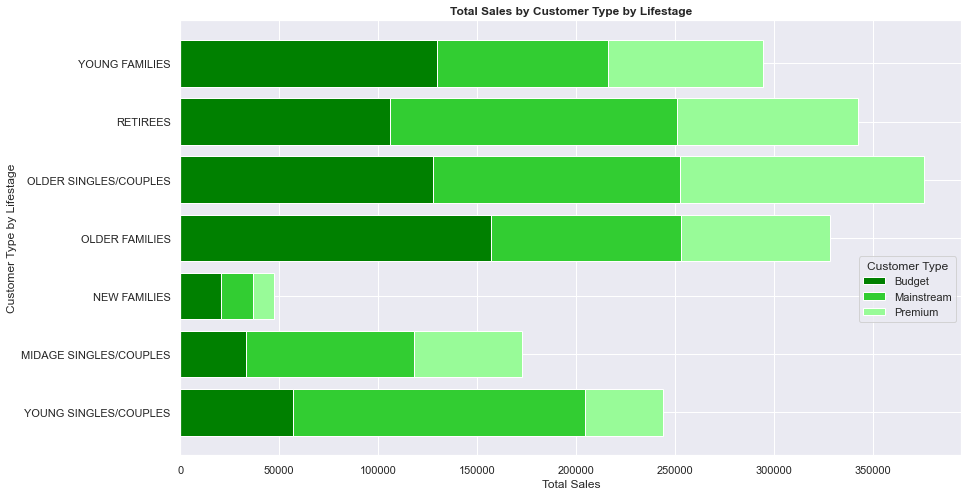

In [86]:
# TOT_SALES per LIFESTAGE split by PREMIUM_CUSTOMER
lifestg_unq = merged_df['LIFESTAGE'].unique().tolist()
list_of_dfs = []

for lifestg in lifestg_unq:
    df = merged_df.loc[merged_df['LIFESTAGE'] == lifestg]
    prem_cust_unq = df['PREMIUM_CUSTOMER'].unique().tolist()

    lifestgs = []

    for i in range(len(prem_cust_unq)):
        lifestgs.append(lifestg)

    cnts = []

    for j in prem_cust_unq:
        cnts.append((df.loc[df['PREMIUM_CUSTOMER'] == j])['TOT_SALES'].sum())
    
    result_df = pd.DataFrame({'LIFESTAGE':lifestg, 'PREMIUM_CUSTOMER':prem_cust_unq, 'TOTAL':cnts})
    list_of_dfs.append(result_df)

prem_cust_ls = pd.concat(list_of_dfs).reset_index(drop = True)

display(prem_cust_ls)

lifestg_unq = prem_cust_ls['LIFESTAGE'].unique().tolist()
budget = []
mainstream = []
premium = []

for a in lifestg_unq:
    aa = prem_cust_ls.loc[prem_cust_ls['LIFESTAGE'] == a]

    budget_df = aa.loc[aa['PREMIUM_CUSTOMER'] == 'Budget']
    budget.append(budget_df['TOTAL'].values[0])

    mainstream_df = aa.loc[aa['PREMIUM_CUSTOMER'] == 'Mainstream']
    mainstream.append(mainstream_df['TOTAL'].values[0])

    premium_df = aa.loc[aa['PREMIUM_CUSTOMER'] == 'Premium']
    premium.append(premium_df['TOTAL'].values[0])

plt.figure(figsize = (14, 8))
plt.title('Total Sales by Customer Type by Lifestage', fontweight = 'bold')
plt.xlabel('Total Sales')
plt.ylabel('Customer Type by Lifestage')
bud = plt.barh(lifestg_unq, budget, color = 'green')
main = plt.barh(lifestg_unq, mainstream, left = budget, color = 'limegreen')
prem = plt.barh(lifestg_unq, premium, left = np.add(budget, mainstream), color = 'palegreen')
plt.legend([bud, main, prem], ['Budget', 'Mainstream', 'Premium'], title = 'Customer Type', loc = 'upper right', bbox_to_anchor = (1, 0.47))
plt.savefig('visualisations/Total_Sales_By_Customer_Type_By_Lifestage.png', bbox_inches = 'tight')
plt.show()

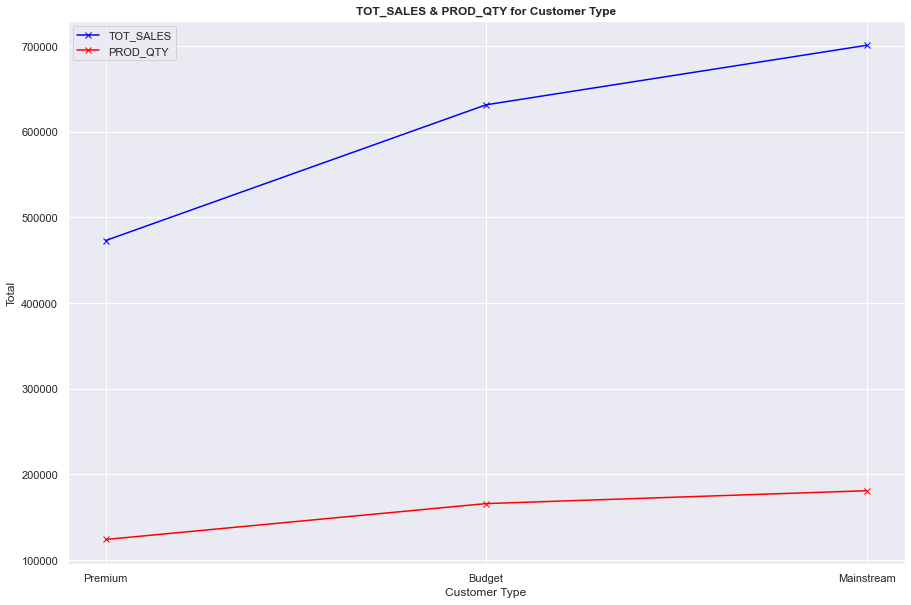

In [87]:
# TOT_SALES by PREMIUM_CUSTOMER
unq_prem_cust = merged_df['PREMIUM_CUSTOMER'].unique().tolist()

get_tot_sale = []

for cust in unq_prem_cust:
    get_tot_sale.append((merged_df.loc[merged_df['PREMIUM_CUSTOMER'] == cust])['TOT_SALES'].sum())

get_tot_qty = []

for cust in unq_prem_cust:
    get_tot_qty.append((merged_df.loc[merged_df['PREMIUM_CUSTOMER'] == cust])['PROD_QTY'].sum())

plt.figure(figsize = (15, 10))
plt.title('TOT_SALES & PROD_QTY for Customer Type', fontweight = 'bold')
plt.xlabel('Customer Type')
plt.ylabel('Total')
plt.plot(unq_prem_cust, get_tot_sale, marker = 'x', color = 'blue')
plt.plot(unq_prem_cust, get_tot_qty, marker = 'x', color = 'red')
plt.legend(['TOT_SALES', 'PROD_QTY'])
plt.savefig('visualisations/TOT_SALES_&_PROD_QTY_For_Customer_Type.png')
plt.show()

,LIFESTAGE,PREMIUM_CUSTOMER,AVERAGE_SALES
0,YOUNG SINGLES/COUPLES,Premium,6.673325
1,YOUNG SINGLES/COUPLES,Budget,6.663023
2,YOUNG SINGLES/COUPLES,Mainstream,7.551279
3,MIDAGE SINGLES/COUPLES,Budget,7.108442
4,MIDAGE SINGLES/COUPLES,Mainstream,7.637156
5,MIDAGE SINGLES/COUPLES,Premium,7.152371
6,NEW FAMILIES,Budget,7.297256
7,NEW FAMILIES,Mainstream,7.313364
8,NEW FAMILIES,Premium,7.231720
9,OLDER FAMILIES,Budget,7.291241


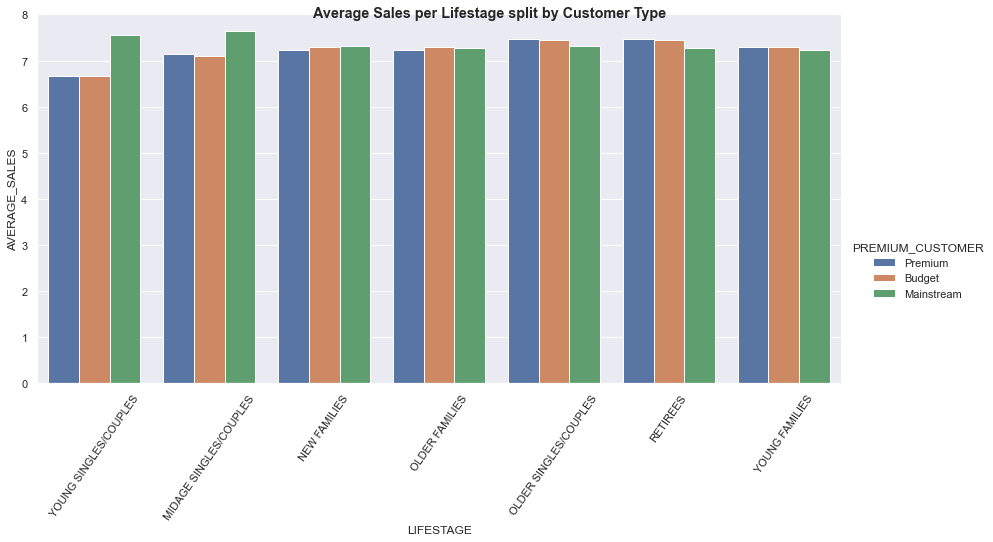

In [88]:
# average TOT_SALES per LIFESTAGE split by PREMIUM_CUSTOMER
unq_lifestg = merged_df['LIFESTAGE'].unique().tolist()

hold_dfs = []

for lifestg in unq_lifestg:
    lifestg_df = merged_df.loc[merged_df['LIFESTAGE'] == lifestg]

    hold_prem_cust = lifestg_df['PREMIUM_CUSTOMER'].unique().tolist()

    hold_avgs = []

    for cust in hold_prem_cust:
        cust_df = lifestg_df.loc[lifestg_df['PREMIUM_CUSTOMER'] == cust]
        avg = (cust_df['TOT_SALES'].sum()) / (cust_df.shape[0])
        hold_avgs.append(avg)

    hold_lifestg = []

    for i in range(len(hold_prem_cust)):
        hold_lifestg.append(lifestg)

    sales_per_ls = pd.DataFrame({'LIFESTAGE':hold_lifestg, 'PREMIUM_CUSTOMER':hold_prem_cust, 'AVERAGE_SALES':hold_avgs})

    hold_dfs.append(sales_per_ls)

sales_per_ls_df = pd.concat(hold_dfs).reset_index(drop = True)

display(sales_per_ls_df)

plot = sns.catplot(x = 'LIFESTAGE', y = 'AVERAGE_SALES', hue = 'PREMIUM_CUSTOMER', data = sales_per_ls_df, kind = 'bar', height = 6, aspect = 2)
plot.fig.suptitle('Average Sales per Lifestage split by Customer Type', fontweight = 'bold')
plot.set_xticklabels(rotation = 55)
plot.savefig('visualisations/Average_Sales_Per_Lifestage_Split_By_Customer_Type.png')

,LIFESTAGE,PREMIUM_CUSTOMER,AVERAGE_PROD_QTY
0,YOUNG SINGLES/COUPLES,Premium,1.807075
1,YOUNG SINGLES/COUPLES,Budget,1.808002
2,YOUNG SINGLES/COUPLES,Mainstream,1.853510
3,MIDAGE SINGLES/COUPLES,Budget,1.893626
4,MIDAGE SINGLES/COUPLES,Mainstream,1.911942
5,MIDAGE SINGLES/COUPLES,Premium,1.891750
6,NEW FAMILIES,Budget,1.855878
7,NEW FAMILIES,Mainstream,1.858124
8,NEW FAMILIES,Premium,1.860887
9,OLDER FAMILIES,Budget,1.945384


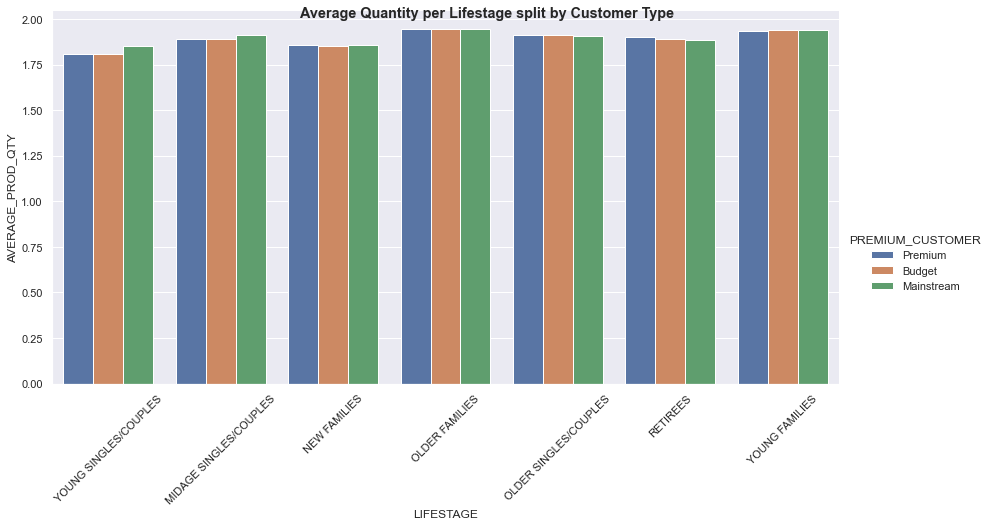

In [89]:
# average PROD_QTY per LIFESTAGE split by PREMIUM_CUSTOMER
unq_lifestg = merged_df['LIFESTAGE'].unique().tolist()

hold_dfs = []

for lifestg in unq_lifestg:
    lifestg_df = merged_df.loc[merged_df['LIFESTAGE'] == lifestg]

    hold_prem_cust = lifestg_df['PREMIUM_CUSTOMER'].unique().tolist()

    hold_avgs = []

    for cust in hold_prem_cust:
        cust_df = lifestg_df.loc[lifestg_df['PREMIUM_CUSTOMER'] == cust]
        avg = (cust_df['PROD_QTY'].sum()) / (cust_df.shape[0])
        hold_avgs.append(avg)

    hold_lifestg = []

    for i in range(len(hold_prem_cust)):
        hold_lifestg.append(lifestg)

    sales_per_ls = pd.DataFrame({'LIFESTAGE':hold_lifestg, 'PREMIUM_CUSTOMER':hold_prem_cust, 'AVERAGE_PROD_QTY':hold_avgs})

    hold_dfs.append(sales_per_ls)

sales_per_ls_df = pd.concat(hold_dfs).reset_index(drop = True)

display(sales_per_ls_df)

plot = sns.catplot(x = 'LIFESTAGE', y = 'AVERAGE_PROD_QTY', hue = 'PREMIUM_CUSTOMER', data = sales_per_ls_df, kind = 'bar', height = 6, aspect = 2)
plot.fig.suptitle('Average Quantity per Lifestage split by Customer Type', fontweight = 'bold')
plot.set_xticklabels(rotation = 45)
plot.savefig('visualisations/Average_Quantity_Per_Lifestage_Split_By_Customer_Type.png')

,PREMIUM_CUSTOMER,AVERAGE_TOT_SALES,AVERAGE_PROD_QTY
0,Premium,7.282751,1.907215
1,Budget,7.277458,1.910675
2,Mainstream,7.374193,1.902086


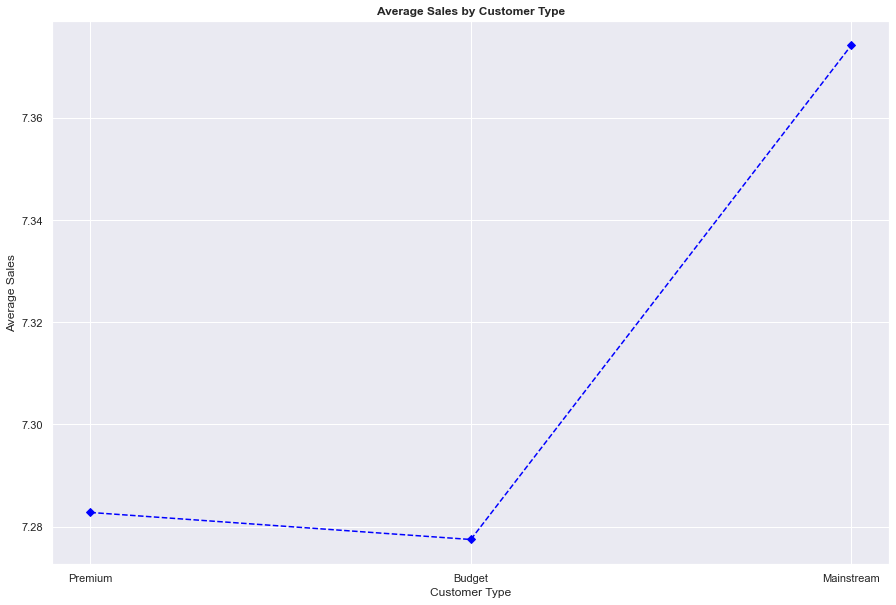

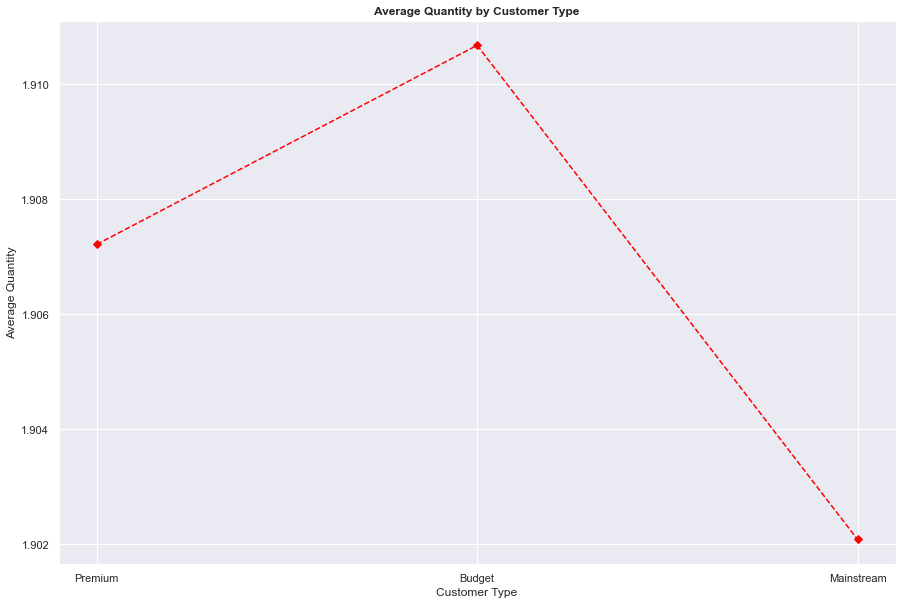

In [90]:
# average TOT_SALES per PREMIUM_CUSTOMER
unq_prem_cust = merged_df['PREMIUM_CUSTOMER'].unique().tolist()

get_avg_tot_sal = []

for cust in unq_prem_cust:
    avg_df = merged_df.loc[merged_df['PREMIUM_CUSTOMER'] == cust]

    get_avg_tot_sal.append(avg_df['TOT_SALES'].sum() / avg_df.shape[0])

get_avg_tot_prod_qty = []

for cust in unq_prem_cust:
    avg_df = merged_df.loc[merged_df['PREMIUM_CUSTOMER'] == cust]

    get_avg_tot_prod_qty.append(avg_df['PROD_QTY'].sum() / avg_df.shape[0])

get_avg_tot_sal_df = pd.DataFrame({'PREMIUM_CUSTOMER':unq_prem_cust, 'AVERAGE_TOT_SALES':get_avg_tot_sal, 'AVERAGE_PROD_QTY':get_avg_tot_prod_qty})

display(get_avg_tot_sal_df)

plt.figure(figsize = (15, 10))
plt.title('Average Sales by Customer Type', fontweight = 'bold')
plt.xlabel('Customer Type')
plt.ylabel('Average Sales')
plt.plot(unq_prem_cust, get_avg_tot_sal, '--', marker = 'D', color = 'blue')
plt.savefig('visualisations/Average_Sales_By_Customer_Type.png')
plt.show()

plt.figure(figsize = (15, 10))
plt.title('Average Quantity by Customer Type', fontweight = 'bold')
plt.xlabel('Customer Type')
plt.ylabel('Average Quantity')
plt.plot(unq_prem_cust, get_avg_tot_prod_qty, '--', marker = 'D', color = 'red')
plt.savefig('visualisations/Average_Quantity_By_Customer_Type.png')
plt.show()

TOT_SALES for LYLTY_CARD_NBRs with COUNTS greater than 5 :: $790543.3
PROD_QTY for LYLTY_CARD_NBRs with COUNTS greater than 5 :: 213442
TOT_SALES for LYLTY_CARD_NBRs with COUNTS greater less than 6 :: $1014634.3999999999
PROD_QTY for LYLTY_CARD_NBRs with COUNTS greater less than 6 :: 256957


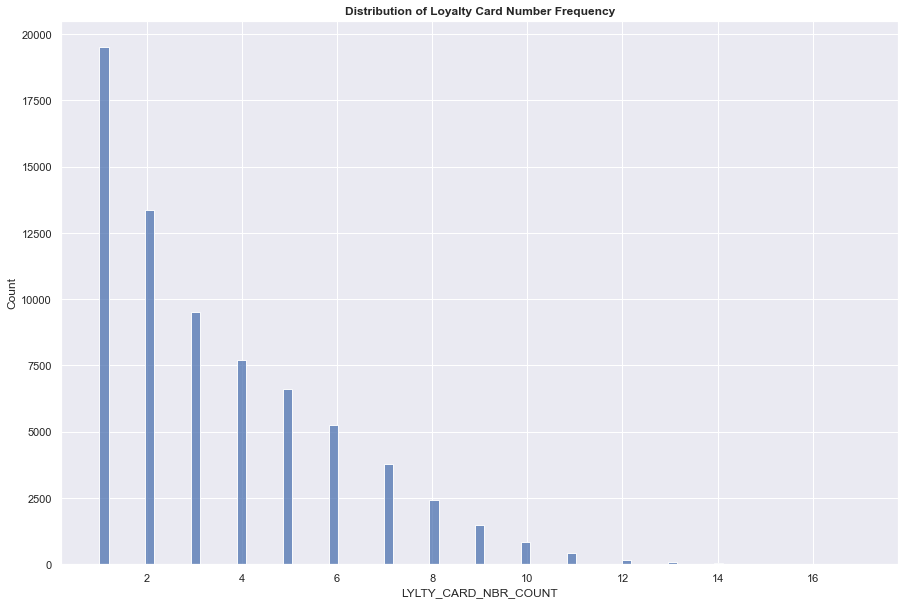

In [91]:
# see most LYLTY_CARD_NBR occurances 
query = '''select LYLTY_CARD_NBR, count(*) as LYLTY_CARD_NBR_COUNT from merged_df group by 1 order by 2 desc'''

# using sql for timing purposes
crd_nbr_occ = sqldf(query)

sns.set(rc = {'figure.figsize':(15, 10)})
fig = sns.histplot(data = crd_nbr_occ, x = 'LYLTY_CARD_NBR_COUNT').set_title('Distribution of Loyalty Card Number Frequency', fontweight = 'bold')
fig = fig.get_figure()
fig.savefig('visualisations/Distribution_Of_Loyalty_Card_Number_Frequency.png')

query1 = '''select distinct LYLTY_CARD_NBR, sum(TOT_SALES) as TOT_SALES, sum(PROD_QTY) as PROD_QTY from merged_df group by 1 order by 2 desc'''

from_mdf = sqldf(query1)

crd_nbr_occ = crd_nbr_occ.merge(from_mdf, on = 'LYLTY_CARD_NBR', how = 'left')

# filters based on LYLTY_CARD_NBR_COUNT
crd_nbr_occ_great_5 = crd_nbr_occ.loc[crd_nbr_occ['LYLTY_CARD_NBR_COUNT'] > 5]
not_crd_nbr_occ_great_5 = crd_nbr_occ.loc[crd_nbr_occ['LYLTY_CARD_NBR_COUNT'] <= 5]

print('TOT_SALES for LYLTY_CARD_NBRs with COUNTS greater than 5 :: ${}'.format(str(crd_nbr_occ_great_5['TOT_SALES'].sum())))
print('PROD_QTY for LYLTY_CARD_NBRs with COUNTS greater than 5 :: {}'.format(str(crd_nbr_occ_great_5['PROD_QTY'].sum())))
print('TOT_SALES for LYLTY_CARD_NBRs with COUNTS greater less than 6 :: ${}'.format(str(not_crd_nbr_occ_great_5['TOT_SALES'].sum())))
print('PROD_QTY for LYLTY_CARD_NBRs with COUNTS greater less than 6 :: {}'.format(str(not_crd_nbr_occ_great_5['PROD_QTY'].sum())))

,LIFESTAGE,BRAND,COUNT
0,YOUNG SINGLES/COUPLES,Doritos,3178
1,YOUNG SINGLES/COUPLES,Infuzions,2013
2,YOUNG SINGLES/COUPLES,Red Rock Deli,2008
3,YOUNG SINGLES/COUPLES,Thins,1959
0,MIDAGE SINGLES/COUPLES,Doritos,2123
1,MIDAGE SINGLES/COUPLES,Red Rock Deli,1478
2,MIDAGE SINGLES/COUPLES,Infuzions,1403
3,MIDAGE SINGLES/COUPLES,Thins,1316
0,NEW FAMILIES,Doritos,635
1,NEW FAMILIES,Infuzions,393


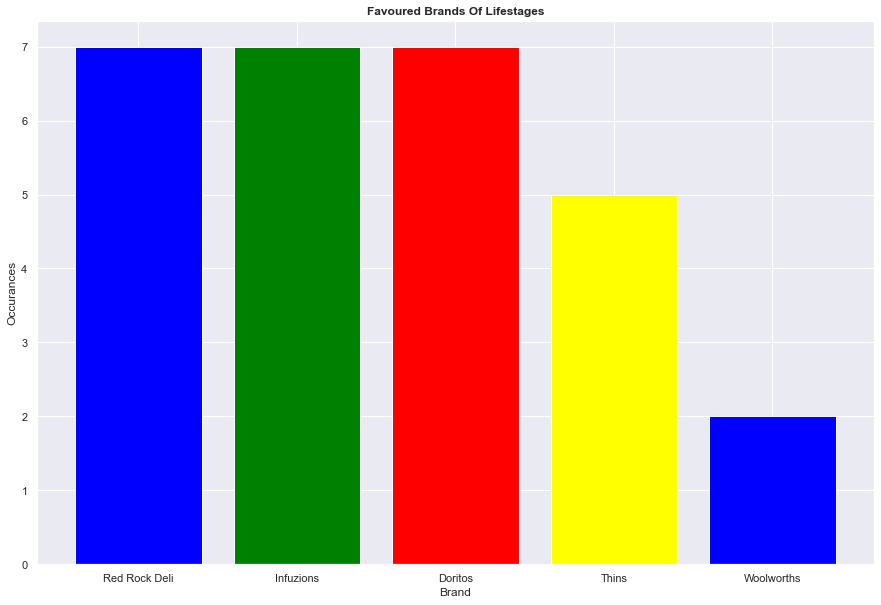

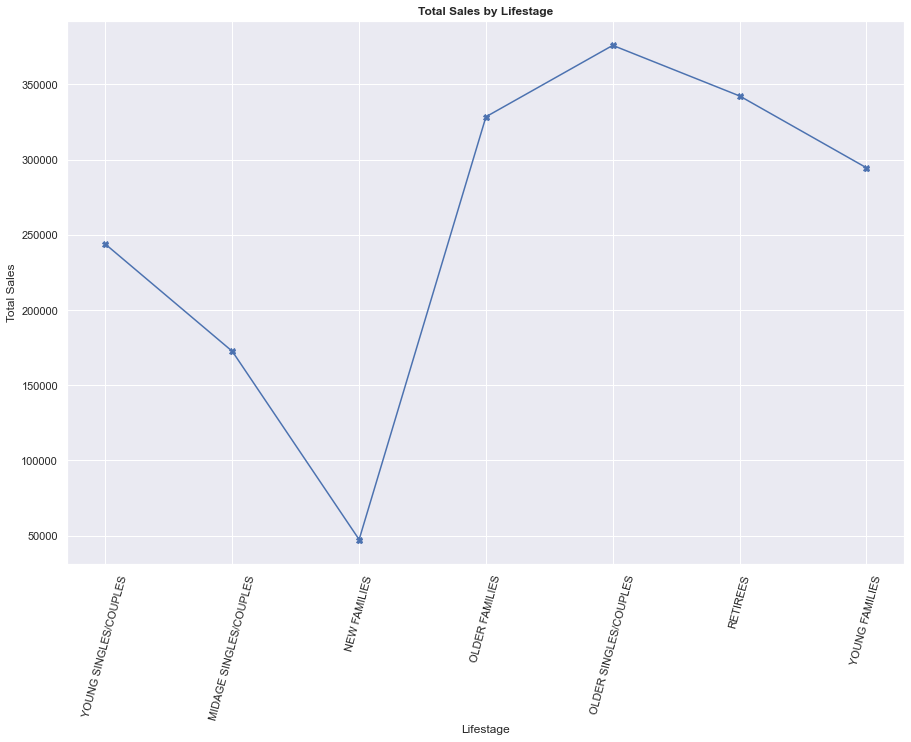

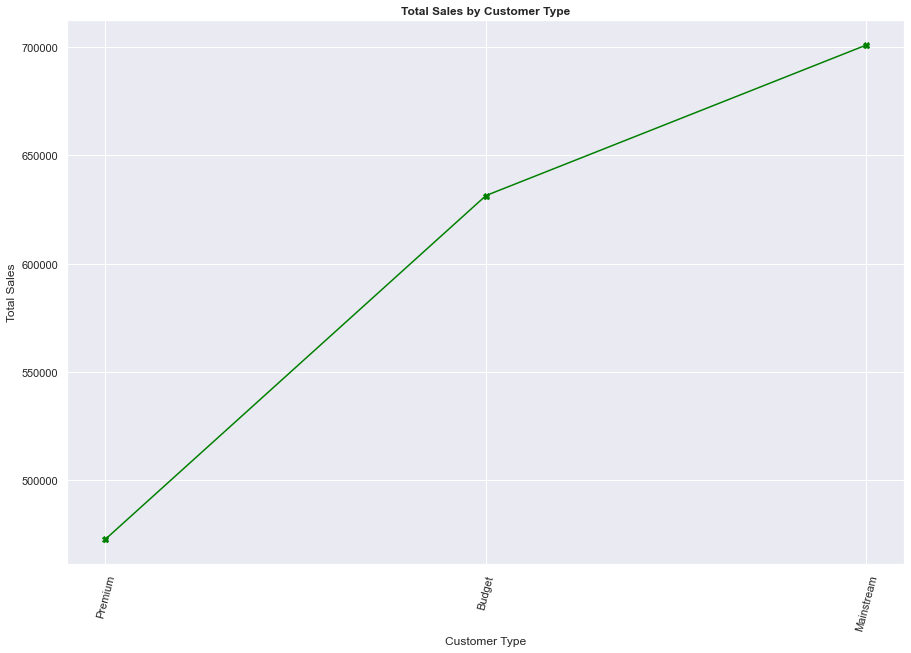

In [92]:
# BRANDS favoured by each LIFESTAGE 
unq_lifestg = merged_df['LIFESTAGE'].unique().tolist()

hold_dfs = []

for lifestg in unq_lifestg:
    lifestg_df = merged_df.loc[merged_df['LIFESTAGE'] == lifestg] 

    query = '''select distinct BRAND, count(*) as COUNT from lifestg_df where BRAND not in ('Kettle', 'Smiths', 'Pringles') group by 1 order by 2 desc'''
    
    df_sql = sqldf(query)
    df_sql = df_sql.iloc[0:4]

    df_sql['LIFESTAGE'] = lifestg
    df_sql = df_sql[['LIFESTAGE', 'BRAND', 'COUNT']]

    hold_dfs.append(df_sql)

favoured_brand = pd.concat(hold_dfs)

# excluded Pringles, Smiths and Kettle
display(favoured_brand)

query2 = '''select distinct BRAND, count(*) as COUNT from favoured_brand group by 1 order by 2 desc'''

plt.figure(figsize = (15, 10))
plt.title('Favoured Brands Of Lifestages', fontweight = 'bold')
plt.xlabel('Brand')
plt.ylabel('Occurances')
plt.bar(sqldf(query2)['BRAND'], sqldf(query2)['COUNT'], color = ['blue', 'green', 'red', 'yellow'])
plt.savefig('visualisations/Favoured_Brands_Of_Lifestages.png')
plt.show()

# TOT_SALES by LIFESTAGE
unq_lifestg = merged_df['LIFESTAGE'].unique().tolist()

hold_sales = []

for lifestg in unq_lifestg:
    hold_sales.append((merged_df.loc[merged_df['LIFESTAGE'] == lifestg])['TOT_SALES'].sum())

plt.figure(figsize = (15, 10))
plt.title('Total Sales by Lifestage', fontweight = 'bold')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation = 75)
plt.plot(unq_lifestg, hold_sales, marker = 'X')
plt.savefig('visualisations/Total_Sales_By_Lifestage.png', bbox_inches = 'tight')
plt.show()

# TOT_SALES by PREMIUM_CUSTOMER
unq_cust = merged_df['PREMIUM_CUSTOMER'].unique().tolist()

hold_sales = []

for cust in unq_cust:
    hold_sales.append((merged_df.loc[merged_df['PREMIUM_CUSTOMER'] == cust])['TOT_SALES'].sum())

plt.figure(figsize = (15, 10))
plt.title('Total Sales by Customer Type', fontweight = 'bold')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.xticks(rotation = 75)
plt.plot(unq_cust, hold_sales, marker = 'X', color = 'green')
plt.savefig('visualisations/Total_Sales_By_Customer_Type.png')
plt.show()

In [93]:
# combine all visualisations into a pdf file
try:
    files_names = os.listdir('visualisations')

    file_names = []

    for file in files_names:
        if '.png' in file:
            file_names.append('visualisations/{}'.format(file))

    open_images = []

    for file in file_names:
        img = Image.open(file)
        open_images.append(img.convert('RGB'))
    
    open_images[0].save('visualisations/all_visualisations.pdf', save_all = True, append_images = open_images)

    print('Successful PDF export')

except Exception as e:
    print(e)
    print('PDF export failed')

Successful PDF export


### Summary  



Mainstream customers make up the majority of the customer base, followed by Budget customers and Premium customers. 

- Mainstream customers comprise of 40.26% of the total customer base
- Budget customers comprise of 33.69% of the total customer base
- Premium customers comprise of 26.05% of the total customer base

Retirees customers make up the majority of the customer base, followed by Older Singles/Couples customers, Young Singles/Couples customers, Older Families customers, Young Families customers, Midage Singles/Couples customers and New Family customers. 

- Retirees customers comprise of 20.38% of the total customer base
- Older Singles/Couples customers comprise of 20.11% of the total customer base
- Young Singles/Couples customers comprise of 19.88% of the total customer base 
- Older Families customers comprise of 13.46% of the total customer base 
- Young Families customers comprise of 12.64% of the total customer base 
- Midage Singles/Couples customers comprise of 10.02% of the total customer base
- New Families customers comprise of 3.51% of the total customer base

It appears that older customers make up the majority of customers purchasing Chips. New and young families do not purchase as many Chips compared to older families possibly due to living costs and reduced demand of snacks.

The most popular Chip Brands by Sales and Quantity sold are Kettle, Smiths, Doritos and Pringles. These Brands have the highest figures by a significant amount. 

Whilst the Average Quantity purchased by Customer Type is similar, Budget customers have the highest followed by Premium and Mainstream customers. 

The majority of the customer base are Retirees, Older Singles/Couples and Young Singles/Customers. New Families make up the least of the customer base by a significant amount. Mainstream customers make up the most of Retirees followed by Budget and Premium customers. The distribution between Customer Types for Older Singles/Couples is very similar. Mainstream customers dominate Young Singles/Couples and Budget customers and Premium customers make up the rest of this lifestage respectively. 

After excluding the most popular Chip Brands (Kettle, Smiths and Pringles), the following Brands are the next most bought. Red Rock Deli, Infuzions and Doritos are the second preferred and bought Chips, followed by Thins and Woolworths Chips.

The Total Sales amount over the timeframe for this data displays a few spikes and drops. There is a significant drop for 2019-02 which could be a result of the spending aftermath of the holiday season. After savings and less spending, the data returns back to previous levels, seen for 2019-03. This pattern can be seen in the months corresponding to Easter, Halloween and Xmas holidays. There is not enough data/dates to determine any seasonality in the data. 

175g, 150g and 134g packet sizes are the most popular sizes purchased, with 175g packets being the most popular by a large margin. 

Mainstream customers have the highest sales followed by Budget and then Premium. 

Older Singles/Couples have the highest sales, followed by Retirees, Older Families, Young Families, Young Singles/Couples, Midage Singles/Couples and New Families. The lifestage groups with the lowest sales reflect upon their low population sizes seen in previous charts. Mainstream and Budget customers spend the most compared to Premium customers, with Mainstream customers spending the most. 

The Average Sales and Quantity purchased amount per Lifestage split by Customer Type is very similar for all Lifestages.

The Average Sales amount is highest for Mainstream customers by a large proportion. Premium customers follow, then Budget. Overall the Average Sales figure is very similar across all Customer Types.

The Total Sales amount and Quantity Purchased amount is proportional to each other for each Customer Type.

Customers who purchase less than 6 times over the entire timeframe for the data make up a significant proportion of the transactions. Customers who have only purchased once over the entire date range are the most common.

Brands that offer 1 - 2 sizes appear to sell more such as Pringles, Doritos, Thins and Tostitos. Brands that offer multiple sizes do not sell as well, with exception to Kettle. It is also interesting to note the unique sizes used by some brands such as Pringles -> 134g, Burger Rings -> 220g and Grain Waves -> 210g. 


### Recommendations

- All lifestages had Kettle, Smiths and Pringles as the most popular brand purchased. It will be good for the Supermarket to promote these Chips to everyone in the form of standard promotion since these brands are already very popular
- Mainstream customers make up most of the sales since they also make up most of the customer base. As a result, the Supermarket must consider running advertisements and promotions that cater towards this group of customers in order to retain and advance sales 
- The Supermarket should also take into account sizes when selling Chips or using promotions given that the most popular sizes are 175g and 150g. There is room to possibly promote larger sizes (family packs etc) in order to increase sales for this particular segment
- Pringles and Doritos make up a significant amount of sales. These brands offer different kinds of Chip products compared to the likes of Smiths, Thins and Kettle. The Supermarket should research unique selling points and promotions to cater towards these kinds of products. These products are popular among Families and Young customers and should be marketed with products and concepts known to these demographics
- Families have the highest average quantity bought and hence the Supermarket should market Chips towards these types of customers on a regular basis to 
- The Supermarket should also consider introducing loyalty programs/spend-for-rewards initiatives. Given that the majority of the loyalty card number frequencies in the data is less than 6, having these programs/initiatives should increase transactions and sales for Chips in the long run 
- Mainstream and Budget customers should be the priority as the total sales for this group is significantly greater than that for Premium customers. Promotions should be more catered for Mainstream and Budget customers
- The Supermarket could also offer heavy discounted promotions during the month after holiday events in order to avoid big drops in sales after heavy spending periods. This could also cater towards Budget customers who can take advantage of cheaper products 
- Brands like Pringles, Kettle, Smiths, Red Rock Deli, Infuzions and Doritos have the highest sales. The Supermarket should ensure promotions and strategies retain the sales and quantities bought for these products. Promotions could also begin targeting other brands like Thins and Woolworths in order to increase popularity for those brands to increase overall sales and volume